In [1]:
import numpy as np
import pandas as pd
# import tensorflow.compat.v2 as tf
# tf.enable_v2_behavior()
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

# Data Viz. 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# Get TensorFlow version.
print(f'TnesorFlow version: {tf.__version__}')
print(f'TnesorFlow Probability version: {tfp.__version__}')

2023-07-14 15:27:52.905224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.7/lib64/stubs:/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/lib64/stubs:/usr/local/cuda-11.7/lib64:
2023-07-14 15:27:52.905256: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TnesorFlow version: 2.9.1
TnesorFlow Probability version: 0.17.0


In [3]:
import os
while os.path.basename(os.getcwd()) != 'Solar_PV_Study':
    os.chdir('../')

In [12]:
X_complete = pd.read_csv('X.csv')
X_complete

,AirTC_Avg_01,AirTC_Avg_02,AirTC_Avg_03,AirTC_Avg_04,AirTC_Avg_05,AirTC_Avg_06,AirTC_Avg_07,AirTC_Avg_08,AirTC_Avg_09,AirTC_Avg_10,...,WS_ms_Avg_15,WS_ms_Avg_16,WS_ms_Avg_17,WS_ms_Avg_18,WS_ms_Avg_19,WS_ms_Avg_20,WS_ms_Avg_21,WS_ms_Avg_22,WS_ms_Avg_23,WS_ms_Avg_24
0,13.795000,13.155833,11.745167,11.026833,10.617000,10.162500,9.861667,9.917000,11.729000,14.273500,...,1.935833,1.753950,1.783283,1.218533,0.453033,0.628083,0.887500,0.945250,0.657283,0.858983
1,13.201333,12.228833,11.664833,12.138500,12.049500,11.693167,11.511500,11.525333,12.585333,15.055333,...,2.214683,1.282683,0.849100,0.890433,0.147367,0.128533,0.068767,0.117967,0.405917,0.692017
2,13.257500,11.948833,11.109000,10.811000,10.513833,10.049333,10.561000,11.074833,12.071833,14.808500,...,2.592667,2.293217,1.942933,1.333617,0.579133,0.685967,1.096483,1.065567,0.878133,1.194117
3,13.726500,12.010333,10.946833,10.513833,9.836167,9.733500,9.917500,9.999500,11.328167,14.202000,...,1.783500,1.847083,1.770217,1.772467,1.059000,1.110417,1.182050,1.645600,1.688117,1.304700
4,13.205167,12.740333,12.022667,11.504667,10.411833,9.630500,9.863833,9.291333,11.149000,14.891500,...,1.684000,1.806100,1.683633,1.706700,0.648733,0.837883,0.748133,0.912267,0.572417,1.089083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30.171333,29.056833,28.011833,27.081167,26.986000,26.532000,26.016000,26.528333,27.933333,30.200833,...,1.317717,1.416767,1.324867,1.264983,0.934950,0.701333,1.282150,1.768617,1.497617,1.541533
96,28.887333,28.810500,28.066500,26.074667,25.335000,24.961167,24.543500,24.161667,26.282833,30.057500,...,1.009767,0.991383,0.859617,0.910233,0.942100,0.911550,1.181033,1.755300,1.308833,1.236183
97,30.016333,29.958167,29.491333,28.479833,27.448000,26.471667,25.754500,26.784333,28.738500,31.382667,...,1.009967,1.248783,1.140017,0.971250,0.861267,0.648550,1.380917,1.882400,1.671167,1.288300
98,28.875167,28.401167,28.286000,27.820833,26.974500,25.890667,25.240333,26.012500,28.305333,30.841667,...,0.903467,0.838117,0.703267,0.878650,0.553900,0.359800,0.081483,0.627067,1.265867,0.690033


In [13]:
# import PCA
from sklearn.decomposition import PCA
# Do PCA on X and print the variance explained by first two principal components
pca = PCA(n_components=2)
X = pca.fit_transform(X_complete)
print('Variance explained by first two principal components:', np.sum(pca.explained_variance_ratio_))

Variance explained by first two principal components: 0.7882438786600097


In [5]:
Y_complete = pd.read_csv('Y.csv')
Y_complete

,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2,Soiling Ratio
0,8030.765,7988.095,8236.495,8230.490,0.072907
1,7944.765,7878.645,8119.190,8098.225,0.258215
2,7774.985,7684.150,7940.385,7888.450,0.654061
3,7848.560,7739.150,8037.415,7983.445,0.671485
4,7937.250,7805.740,8100.810,8037.890,0.776712
...,...,...,...,...,...
95,8099.225,7469.920,8203.790,7876.995,3.983464
96,7967.235,7445.445,8070.170,7759.770,3.846263
97,7922.760,7525.105,8268.625,7905.025,4.397345
98,7927.120,7461.750,8231.545,7850.160,4.633213


In [6]:
Y = Y_complete['Soiling Ratio']
Y

0     0.072907
1     0.258215
2     0.654061
3     0.671485
4     0.776712
        ...   
95    3.983464
96    3.846263
97    4.397345
98    4.633213
99    4.813991
Name: Soiling Ratio, Length: 100, dtype: float64

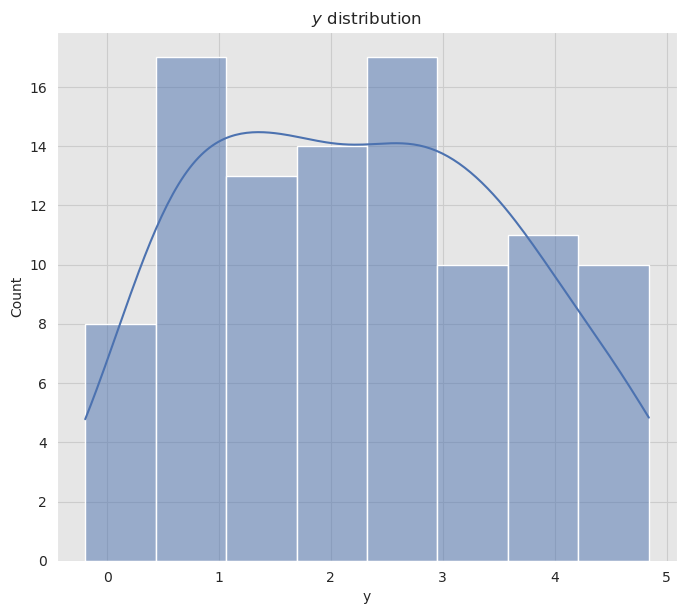

In [8]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.histplot(x=Y, kde=True, ax=ax)
ax.set(title='$y$ distribution', xlabel='y')
plt.show()

In [14]:
# Set seed.
tf.random.set_seed(42)
# Set tensor numeric type.
dtype = 'float32'

x = tf.convert_to_tensor(X, dtype=dtype)

y = tf.convert_to_tensor(Y, dtype=dtype)
y = tf.reshape(y, (-1, 1))

In [15]:
jds_ab = tfd.JointDistributionNamedAutoBatched(dict(

    sigma=tfd.HalfNormal(scale=[tf.cast(1.0, dtype)]),

    alpha=tfd.Normal(
        loc=[tf.cast(0.0, dtype)], 
        scale=[tf.cast(10.0, dtype)]
    ),

    beta=tfd.Normal(
        loc=[[tf.cast(0.0, dtype)], [tf.cast(0.0, dtype)]], 
        scale=[[tf.cast(10.0, dtype)], [tf.cast(10.0, dtype)]]
    ),

    y=lambda beta, alpha, sigma: 
        tfd.Normal(
            loc=tf.linalg.matmul(x, beta) + alpha, 
            scale=sigma
        ) 
))

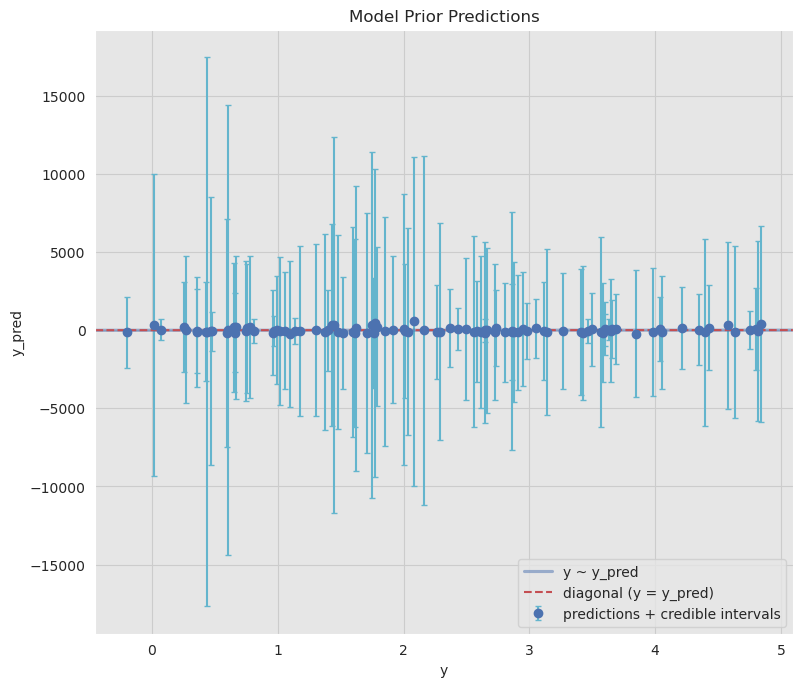

In [16]:
# Sample from the prior.
prior_samples = jds_ab.sample(500)['y']

prior_samples = tf.squeeze(prior_samples)
prior_mean = tf.math.reduce_mean(prior_samples, axis=0).numpy()
prior_std = tf.math.reduce_std(prior_samples, axis=0).numpy()

fig, ax = plt.subplots(figsize=(9, 8)) 
ax.errorbar(
    x=tf.squeeze(y).numpy(), 
    y=prior_mean, 
    yerr=2*prior_std,
    fmt='o',
    ecolor=sns_c[9],
    capsize=2,
    label='predictions + credible intervals',
)
sns.regplot(
    x=tf.squeeze(y).numpy(), 
    y=prior_mean, 
    color=sns_c[0], 
    scatter=False,
    line_kws=dict(alpha=0.5), 
    label='y ~ y_pred', 
    truncate=False,
    ax=ax
)
ax.axline(xy1=(0,0), slope=1, linestyle='--', color=sns_c[3], label='diagonal (y = y_pred)')
ax.legend(loc='lower right')
ax.set(title='Model Prior Predictions', xlabel='y', ylabel='y_pred');

In [18]:
alpha, sigma = 1, 1
beta = [1, 2.5]

def target_log_prob_fn(beta=beta, alpha=alpha, sigma=sigma):
    return jds_ab.log_prob(beta=beta, alpha=alpha, sigma=sigma, y=y)

In [19]:
# Size of each chain.
num_results = int(1e4)
# Burn-in steps.
num_burnin_steps = int(1e3)
# Hamiltonian Monte Carlo transition kernel. 
# In TFP a TransitionKernel returns a new state given some old state.
hcm_kernel  = tfp.mcmc.HamiltonianMonteCarlo(
  target_log_prob_fn=target_log_prob_fn,
  step_size=1.0,
  num_leapfrog_steps=3
  
)
# This adapts the inner kernel's step_size.
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
  inner_kernel = hcm_kernel,
  num_adaptation_steps=int(num_burnin_steps * 0.8)
)
# Run the chain (with burn-in).
@tf.function
def run_chain():
  # Run the chain (with burn-in). 
  # Implements MCMC via repeated TransitionKernel steps.
  samples, is_accepted = tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      current_state=[
          tf.convert_to_tensor([[1.0], [1.0]], dtype=dtype),
          tf.convert_to_tensor([1.0], dtype=dtype), 
          tf.convert_to_tensor([1.0], dtype=dtype)
      ],
      kernel=adaptive_hmc,
      trace_fn=lambda _, pkr: pkr.inner_results.is_accepted
    )
  return samples

In [20]:
# Set number of chains. 
num_chains = 5
# Run sampling. 
chains = [run_chain() for i in range(num_chains)]

In [21]:
chains_t = list(map(list, zip(*chains)))

chains_samples = [tf.squeeze(tf.concat(samples, axis=0)) for samples in chains_t]

In [22]:
chains_df = pd.concat(
    objs=[pd.DataFrame(samples.numpy()) for samples in chains_samples], 
    axis=1
)

params = ['beta_0', 'beta_1', 'alpha', 'sigma']
chains_df.columns = params

chains_df = chains_df \
    .assign(
        sample_id=lambda x: range(x.shape[0]), 
        chain_sample_id=lambda x: x['sample_id'] % num_results,
        chain_id=lambda x: (x['sample_id'] / num_results).astype(int) + 1
    ) \
    .assign(chain_id=lambda x: 'c_' + x['chain_id'].astype(str)) \
    

chains_df.head()

,beta_0,beta_1,alpha,sigma,sample_id,chain_sample_id,chain_id
0,-0.002710,0.001606,1.004732,4.431392,0,0,c_1
1,-0.001632,0.000559,1.005115,4.430933,1,1,c_1
2,-0.000642,-0.000210,1.005121,4.428913,2,2,c_1
3,-0.000325,-0.003285,1.006945,4.430289,3,3,c_1
4,0.000589,-0.002418,1.004164,4.429823,4,4,c_1


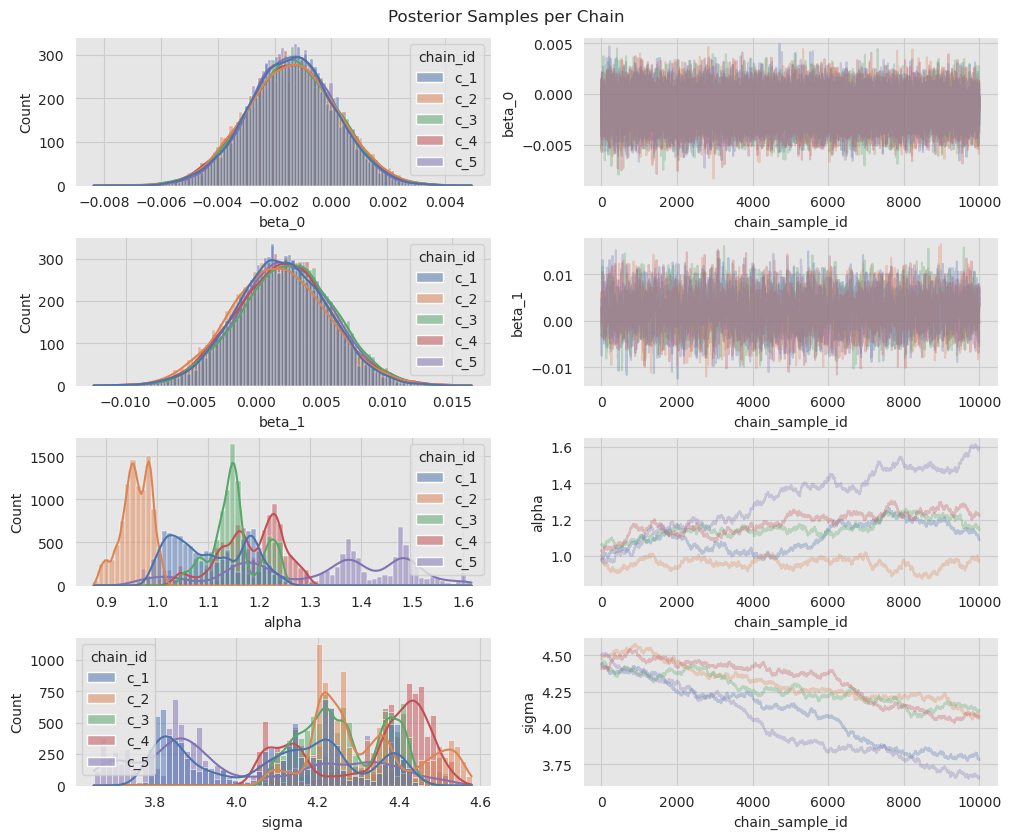

In [23]:
fig, axes = plt.subplots(nrows=len(params), ncols=2, figsize=(10, 8), constrained_layout=True)

for i, param in enumerate(params):
    sns.histplot(x=param, data=chains_df, hue='chain_id', kde=True, ax=axes[i][0])
    sns.lineplot(x='chain_sample_id', y=param, data=chains_df, hue='chain_id', alpha=0.3, legend=False, ax=axes[i][1])

fig.suptitle('Posterior Samples per Chain', y=1.03);

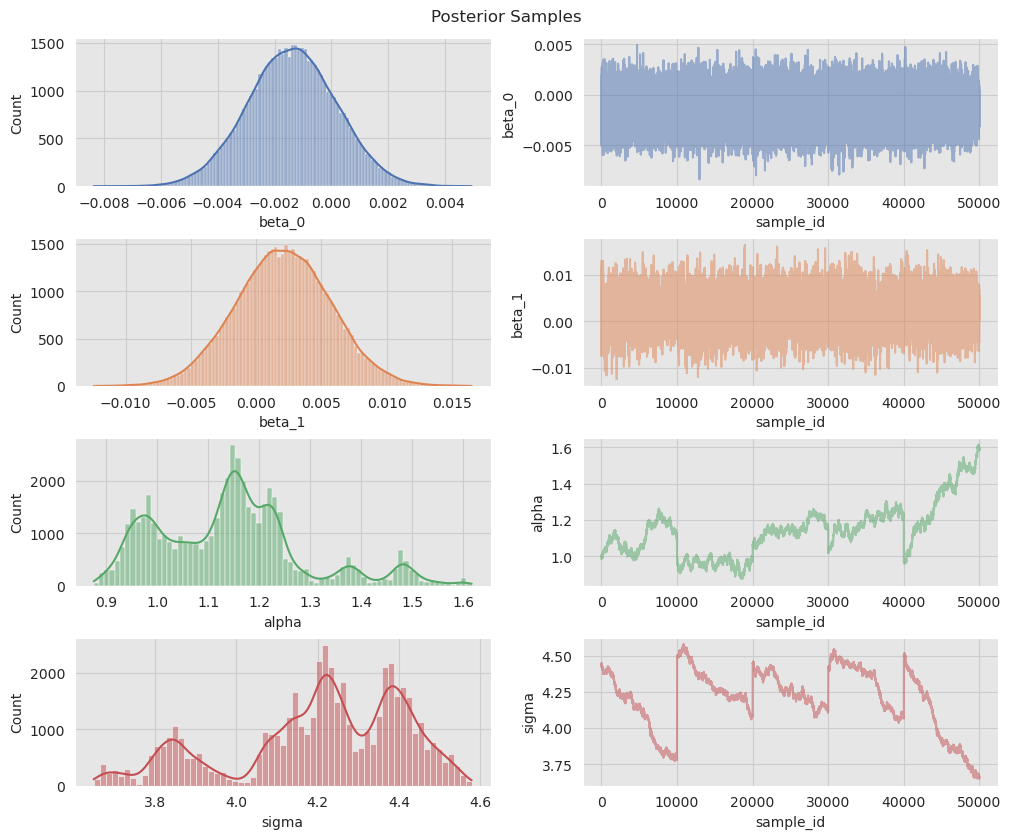

In [24]:
fig, axes = plt.subplots(nrows=len(params), ncols=2, figsize=(10, 8), constrained_layout=True)

for i, param in enumerate(params):
    sns.histplot(x=param, data=chains_df, color=sns_c[i], kde=True, ax=axes[i][0])
    sns.lineplot(x='sample_id', y=param, data=chains_df, color=sns_c[i], alpha=0.5, ax=axes[i][1])

fig.suptitle('Posterior Samples', y=1.03);

In [25]:
# Here we compute mu = alpha + beta x.
mu_posterior_samples = tf.linalg.matmul(tf.reshape(chains_samples[1], (-1, 1)), tf.ones(shape=(1, x.shape[0]))) \
    + tf.linalg.matmul(chains_samples[0], tf.transpose(x)) 

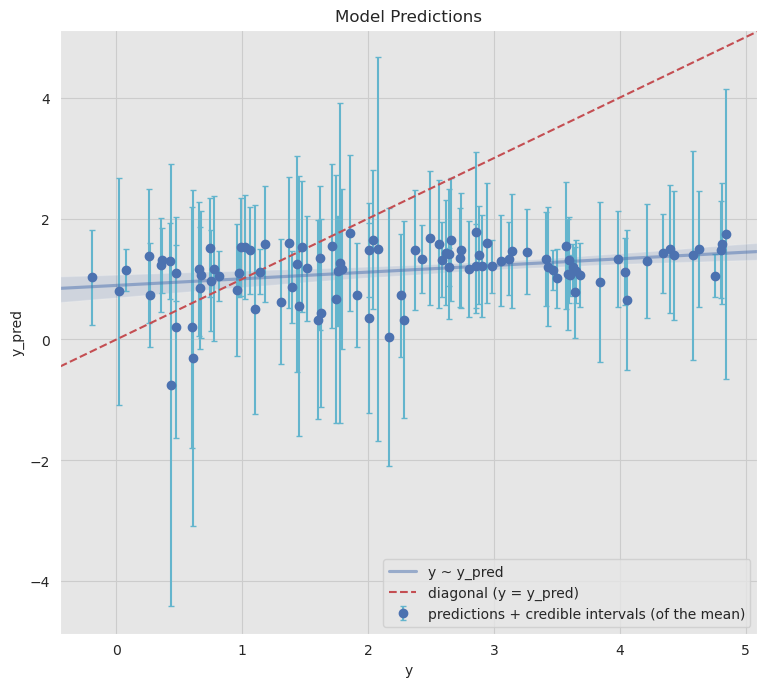

In [26]:
mu_posterior_mean = tf.math.reduce_mean(mu_posterior_samples, axis=0).numpy()
mu_posterior_std = tf.math.reduce_std(mu_posterior_samples, axis=0).numpy()

fig, ax = plt.subplots(figsize=(9, 8)) 
ax.errorbar(
    x=tf.squeeze(y).numpy(), 
    y=mu_posterior_mean, 
    yerr=2*mu_posterior_std,
    fmt='o',
    ecolor=sns_c[9],
    capsize=2,
    label='predictions + credible intervals (of the mean)'
)
sns.regplot(
    x=tf.squeeze(y).numpy(), 
    y=mu_posterior_mean, 
    color=sns_c[0], 
    scatter=False,
    line_kws=dict(alpha=0.5), 
    label='y ~ y_pred', 
    truncate=False,
    ax=ax
)
ax.axline(xy1=(0,0), slope=1, linestyle='--', color=sns_c[3], label='diagonal (y = y_pred)')
ax.legend(loc='lower right')
ax.set(title='Model Predictions', xlabel='y', ylabel='y_pred');

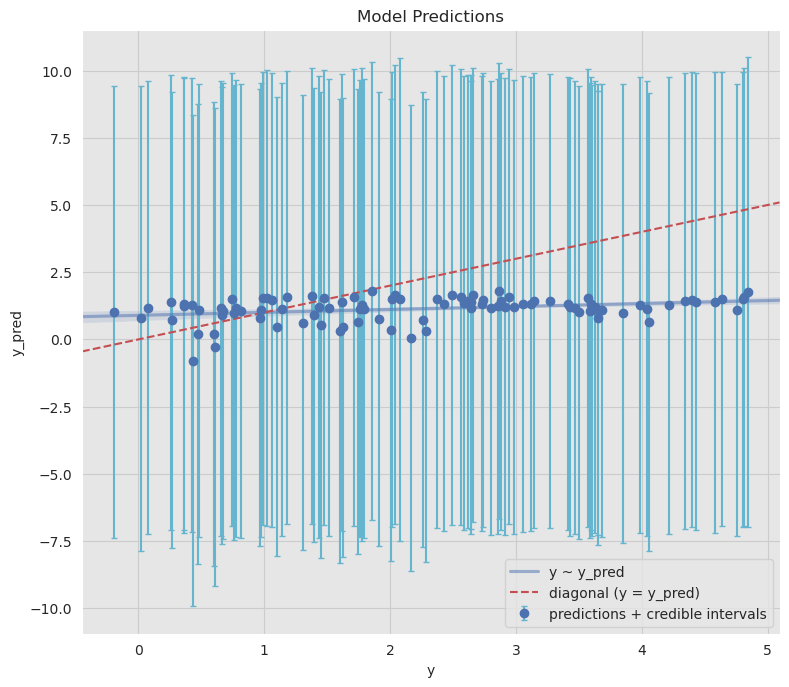

In [27]:
pred_samples = tf.map_fn(
    fn=lambda z: tfd.Normal(loc=z, scale=chains_samples[2]).sample(1), 
    elems=tf.transpose(mu_posterior_samples)
)

pred_samples = tf.squeeze(pred_samples)

posterior_mean = tf.math.reduce_mean(pred_samples, axis=1).numpy()
posterior_std = tf.math.reduce_std(pred_samples, axis=1).numpy()

fig, ax = plt.subplots(figsize=(9, 8)) 
ax.errorbar(
    x=tf.squeeze(y).numpy(), 
    y=posterior_mean, 
    yerr=2*posterior_std,
    fmt='o',
    ecolor=sns_c[9],
    capsize=2,
    label='predictions + credible intervals',
)
sns.regplot(
    x=tf.squeeze(y).numpy(), 
    y=mu_posterior_mean, 
    color=sns_c[0], 
    scatter=False,
    line_kws=dict(alpha=0.5), 
    label='y ~ y_pred', 
    truncate=False,
    ax=ax
)
ax.axline(xy1=(0,0), slope=1, linestyle='--', color=sns_c[3], label='diagonal (y = y_pred)')
ax.legend(loc='lower right')
ax.set(title='Model Predictions', xlabel='y', ylabel='y_pred');